In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("../data/raw/train.csv", index_col = 'Id')
test  = pd.read_csv("../data/raw/test.csv", index_col = 'Id')

print("Train shape:", train.shape, " Test shape:", test.shape)
train.head()

Train shape: (1460, 80)  Test shape: (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [3]:
# data statistics
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# target information
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

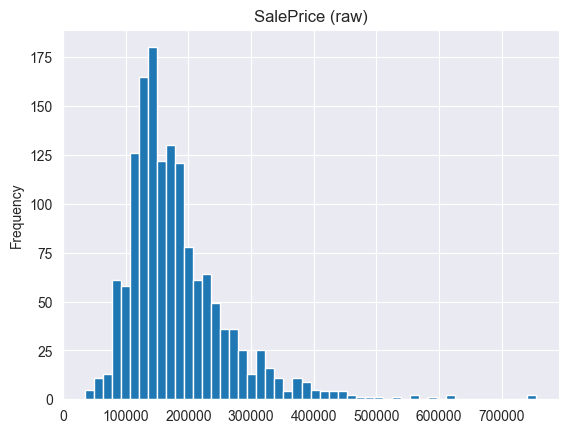

In [5]:
# target quick look
ax = train['SalePrice'].plot(kind='hist', bins=50, title= 'SalePrice (raw)')
plt.show()

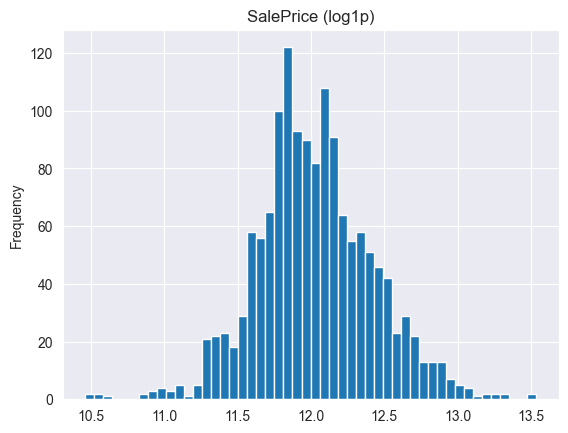

In [6]:
# Log transform check
train["_SalePrice_log1p"] = np.log1p(train["SalePrice"])
ax = train["_SalePrice_log1p"].plot(kind="hist", bins=50, title="SalePrice (log1p)")
plt.show()

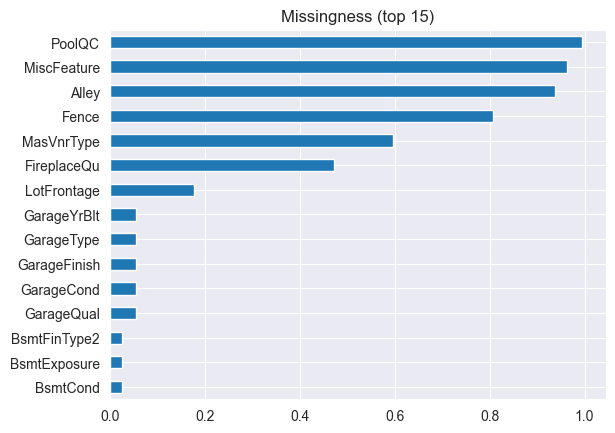

In [7]:
# Missingness snapshot (top 15)
train.isna().mean().sort_values(ascending=False).head(15).plot.barh(title="Missingness (top 15)")
plt.gca().invert_yaxis()
plt.show()

Identifying types of features:

In [8]:
numerical_features = [
    "LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath",
    "BsmtHalfBath", "FullBath", "HalfBath", "Bedroom", "Kitchen", "TotRmsAbvGrd", "Fireplaces",
    "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"
]

unordered_categorical_features = [
    "MSSubClass", "MSZoning", "Street", "Alley", "LandContour", "LotConfig",
    "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle",
    "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation",
    "Heating", "CentralAir", "Electrical", "GarageType", "MiscFeature", "SaleType", "SaleCondition"
]

ordered_features = [
    "LotShape", "Utilities", "LandSlope", "OverallQual", "OverallCond", "ExterQual", "ExterCond",
    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "KitchenQual",
    "Functional", "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive",
    "PoolQC", "Fence"
]

train[ordered_features].nunique()

LotShape         4
Utilities        2
LandSlope        3
OverallQual     10
OverallCond      9
ExterQual        4
ExterCond        5
BsmtQual         4
BsmtCond         4
BsmtExposure     4
BsmtFinType1     6
BsmtFinType2     6
KitchenQual      4
Functional       7
FireplaceQu      5
GarageFinish     3
GarageQual       5
GarageCond       5
PavedDrive       3
PoolQC           3
Fence            4
dtype: int64

analysis for numerical features

<Axes: >

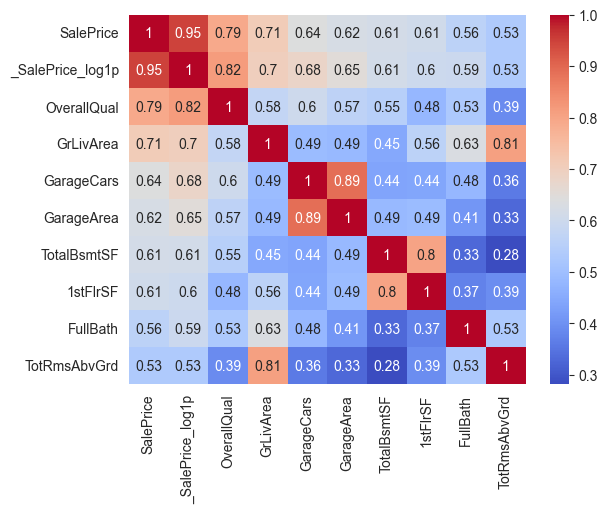

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.concat([train, test])


corr = df.corr(numeric_only=True)
top_corr = corr["SalePrice"].abs().sort_values(ascending=False).head(10)
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap="coolwarm")

<Axes: xlabel='OverallQual'>

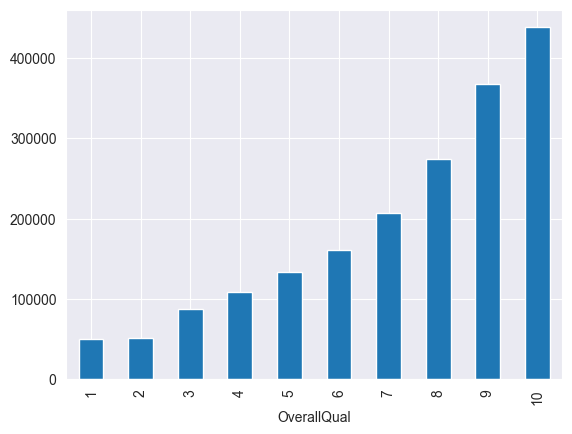

In [10]:
df.groupby("OverallQual")["SalePrice"].mean().plot(kind="bar")

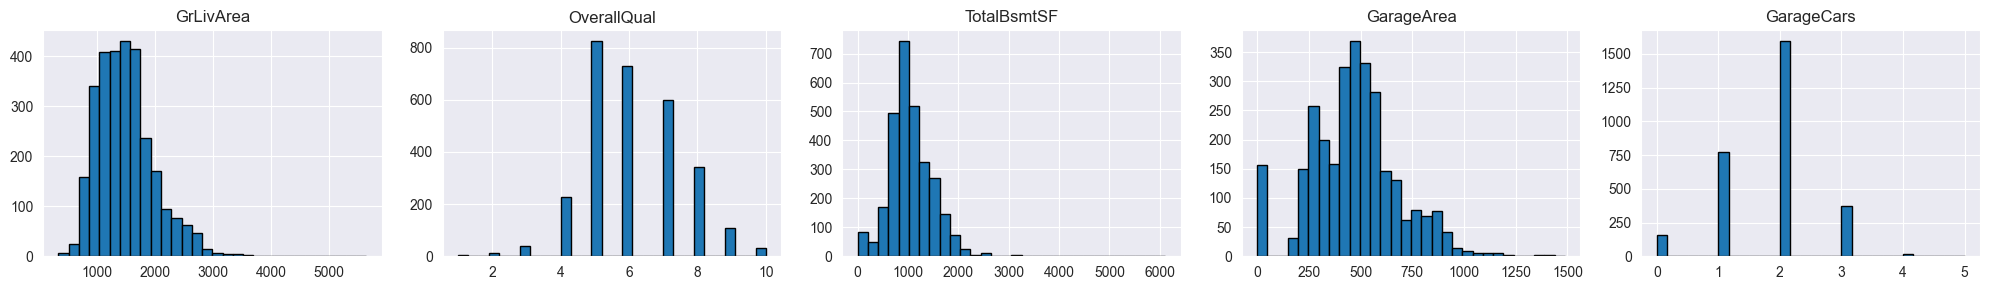

In [15]:
import math

high_corr_features = ["GrLivArea", "OverallQual", "TotalBsmtSF", "GarageArea", 'GarageCars']

# Grid size
n_cols = 5
n_rows = math.ceil(len(high_corr_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(high_corr_features):
    df[col].hist(ax=axes[i], bins=30, edgecolor='black')
    axes[i].set_title(col)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Base model evaluation before preprocessing

In [7]:
%load_ext autoreload
%autoreload 2
from src.functions import load_data, evaluate_model

df_train, df_test = load_data()

X = df_train.drop(columns=["SalePrice"])
y = df_train["SalePrice"]

# Convert object columns to category
for col in X.select_dtypes(include="object").columns:
    X[col] = X[col].astype("category")

rmsle, mae = evaluate_model(X, y);

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
RMSLE: 0.14328
MAE: 17498.41001
